## EDA

In [1]:
import pandas as pd

# Dataset Load
df = pd.read_csv("Course_Sales_Data.csv")
df

,Gender,Group,Pre_Score,Post_Score,Study_Hours,Exam_Score,Income,Satisfaction_Level,Purchased
0,Female,Group_B,56.4,48.6,7.41,67.3,282.66,4,Yes
1,Female,Group_B,56.2,66.7,4.50,46.4,644.22,2,No
2,Male,Group_B,74.6,79.9,3.66,36.6,155.65,1,No
3,Female,Group_B,64.5,67.1,6.28,63.5,2954.17,3,Yes
4,Female,Group_A,57.2,58.5,3.42,37.0,1016.20,4,Yes
...,...,...,...,...,...,...,...,...,...
420,Male,Group_A,76.2,86.2,6.19,58.0,3914.54,4,No
421,Male,Group_C,66.3,65.0,4.50,42.5,144.34,3,Yes
422,Male,Group_A,50.9,49.3,7.50,64.7,7895.42,4,No
423,Female,Group_A,69.6,70.9,7.20,65.7,286.69,2,No


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              425 non-null    object 
 1   Group               425 non-null    object 
 2   Pre_Score           425 non-null    float64
 3   Post_Score          425 non-null    float64
 4   Study_Hours         425 non-null    float64
 5   Exam_Score          425 non-null    float64
 6   Income              425 non-null    float64
 7   Satisfaction_Level  425 non-null    int64  
 8   Purchased           425 non-null    object 
dtypes: float64(5), int64(1), object(3)
memory usage: 30.0+ KB


In [3]:
df.describe()

,Pre_Score,Post_Score,Study_Hours,Exam_Score,Income,Satisfaction_Level
count,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000
mean,65.222824,68.702353,6.179082,59.275059,2974.936329,3.120000
std,9.991821,11.372604,2.178884,17.890797,3148.915441,1.212046
min,36.900000,34.600000,0.140000,5.500000,0.560000,1.000000
25%,58.200000,61.000000,4.840000,48.000000,771.230000,2.000000
50%,64.600000,67.900000,6.200000,60.100000,1962.050000,3.000000
75%,72.800000,76.300000,7.550000,71.100000,4241.100000,4.000000
max,91.300000,102.800000,12.520000,112.900000,17337.990000,5.000000


In [4]:
df.isnull().sum()

Gender                0
Group                 0
Pre_Score             0
Post_Score            0
Study_Hours           0
Exam_Score            0
Income                0
Satisfaction_Level    0
Purchased             0
dtype: int64

## Start Hypothesis Test

**A brief explanation has been provided for the tests we will conduct in each column.**
- Z-test, One-sample T-test → Compare with Expected value and Exam_Score 

- Independent T-test → Exam_Score by Gender

- Paired T-test → Pre_Score vs Post_Score

- One-way ANOVA → Exam_Score by Group

- Pearson / Spearman Correlation → Study_Hours vs Exam_Score, or Satisfaction_Level vs Income

- Mann-Whitney U Test → Income by Gender

- Wilcoxon Signed-Rank Test → Pre_Score vs Post_Score (non-parametric alternative)

- Kruskal-Wallis Test → Income by Group

- Chi-square Test → Gender vs Purchased

#### Hypothesis Testing Steps
Here are the **5 key steps of hypothesis testing** in English:

#### 1. **State the Hypotheses**  
   - **Null Hypothesis (H₀):** Represents the default or no-effect scenario (e.g., "no difference").  
   - **Alternative Hypothesis (H₁ or Ha):** Reflects the researcher’s claim (e.g., "there is a difference").  
   *Example:*  
   H₀: μ = 10, H₁: μ ≠ 10 (two-tailed test).  

#### 2. **Set the Significance Level (α)**  
   - Typically **α = 0.05** (5%), the threshold for rejecting H₀. It defines the risk of a **Type I error** (falsely rejecting H₀).  

#### 3. **Check Assumption and Calculate the Test Statistic**  
   - Use sample data to compute a statistic (e.g., *z-score*, *t-score*, or *chi-square*) based on the test type (e.g., Z-test, T-test).  

#### 4. **Determine the Critical Value or p-value**  
   - **Critical Value Approach:** Compare the test statistic to a threshold from tables (e.g., z-table).  
   - **p-value Approach:** Find the probability of observing the result under H₀. Reject H₀ if **p-value < α**.  

#### 5. **Make a Decision & Conclude**  
   - **Reject H₀** if the test statistic falls in the rejection region (or p-value < α).  
   - **Fail to reject H₀** if evidence is insufficient.  
   - *Example conclusion:* "At α=0.05, we reject H₀, suggesting the mean differs significantly from 10."  

### Parametric Test (For Normal Distribution)

| Analysis Type           | Parametric         | Non-parametric            |
| ----------------------- | ------------------ | ------------------------- |
| 1 group                 | One-sample t-test  | Wilcoxon signed-rank      |
| 2 groups (indep.)       | Independent t-test | Mann-Whitney U test       |
| 2 groups (paired)       | Paired t-test      | Wilcoxon signed-rank      |
| >2 groups               | One-way ANOVA      | Kruskal-Wallis            |
| >2 paired groups        | Repeated ANOVA     | Friedman test             |
| Correlation             | Pearson            | Spearman                  |
| Categorical association | ❌                  | Chi-square, Fisher’s test |


### Assumptions of Parametric Tests
**Normality**
- The data should be approximately normally distributed, especially for small sample sizes.

**Homogeneity of Variance (Homoscedasticity)**
- The variance among groups should be approximately equal.

**Independence of Observations**
- The observations should be independent of each other — one observation should not influence another.

**Scale of Measurement**
- The dependent variable should be measured at an interval or ratio scale (i.e., continuous and numeric).

### Check Assumptions for Z-test

In [5]:
from scipy import stats 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

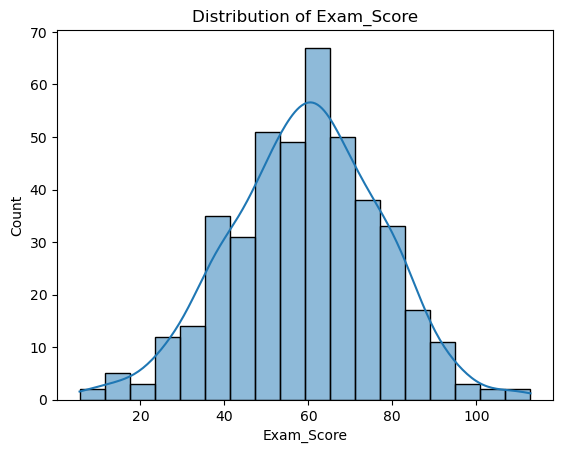

In [6]:
# Histogram + KDE plot
sns.histplot(df['Exam_Score'], kde=True)
plt.title("Distribution of Exam_Score")
plt.show()

**The histogram with kernel density estimate (KDE) shows:**

- A symmetrical bell-shaped curve (normal distribution pattern)

- The smooth KDE line closely follows the expected normal distribution

- Good balance of scores on both sides of the mean

- No significant skewness or kurtosis visible

**This visual representation clearly demonstrates the characteristic 'bell curve' shape we expect from normally distributed data.**

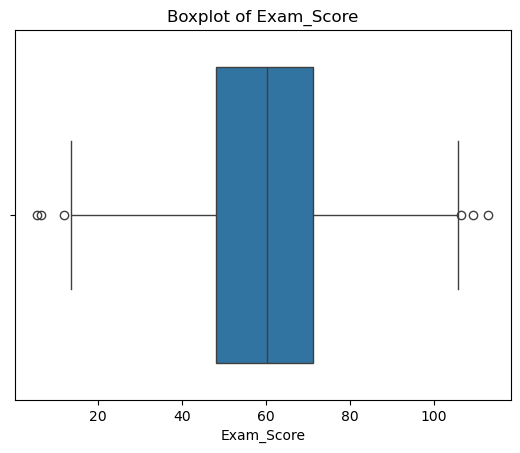

In [7]:
sns.boxplot(x=df['Exam_Score'])
plt.title("Boxplot of Exam_Score")
plt.show() 

- The central line represents the median (50th percentile)

- The box spans the interquartile range (IQR) from Q1 (25th percentile) to Q3 (75th percentile).

**This visualization provides another perspective that aligns with our statistical tests for normality.**

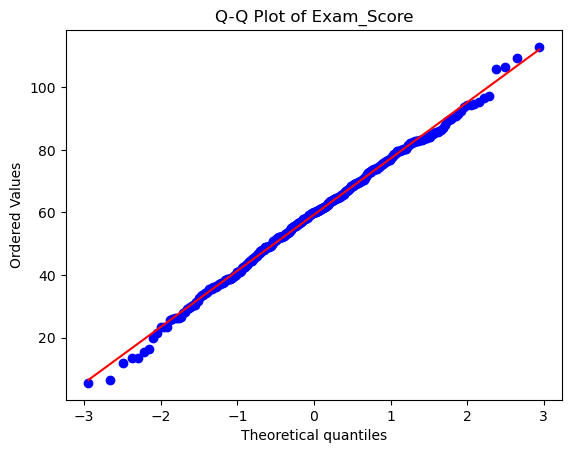

In [8]:
# Q-Q plot
stats.probplot(df['Exam_Score'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Exam_Score")
plt.show()

**The Q-Q plot shows how closely the exam scores follow a normal distribution. Since most data points fall along the straight reference line (with some expected minor deviations at the tails), we can conclude that the data is approximately normally distributed. The closer the points are to the line, the better the fit to a normal distribution.**

In [9]:
stat, p = stats.shapiro(df['Exam_Score'])
print(f"Shapiro-Wilk Test: statistic={stat:.4f}, p-value={p:.4f}")

if p > 0.05:
    print("Data follows a normal distribution (p > 0.05)")
else:
    print("Data does not follow a normal distribution (p ≤ 0.05)")

Shapiro-Wilk Test: statistic=0.9973, p-value=0.7173
Data follows a normal distribution (p > 0.05)


## Z-test 

**Why We Use the Z-test:**
- To test whether the sample mean is significantly different from a known or hypothesized population mean.

- It helps determine if the observed data occurred by chance, or if it indicates a real effect.

- It's used in quality control, surveys, A/B testing, etc., when population parameters are known.

In [10]:
sample_mean = df['Exam_Score'].mean()
sample_mean

59.27505882352941

In [11]:
sample_std = df['Exam_Score'].std()
sample_std

17.890796597292216

In [12]:
# Known population standard deviation
pop_std = 20
sample_mean = df['Exam_Score'].mean()
sample_size = len(df['Exam_Score'])
expected_mean = 60       #59.27505882352941 --> p = 1

# Z-test statistic
z_stat = (sample_mean - expected_mean) / (pop_std / np.sqrt(sample_size))

# p-value (two-tailed)
p_value_z = 2 * (1 - stats.norm.cdf(abs(z_stat)))

print("Z-test Results:")
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value_z:.4f}")

Z-test Results:
Z-statistic: -0.7473
P-value: 0.4549


**Based on the Z-test, the sample mean of 59.28 is not significantly different from the expected population mean of 60 (Z = -0.7473, p = 0.4549).
Therefore, we fail to reject the null hypothesis, and conclude that the sample average is statistically similar to the population mean.**

- if Z-stat is positive (+) → Sample mean > Expected mean

- if Z-stat is negative (−) → Sample mean < Expected mean

## T-test

### One-Sample T-test

In [13]:
stat, p = stats.ttest_1samp(df['Exam_Score'], popmean=60)

print("\nOne-Sample T-test Results:")
print(f"T-statistic: {stat:.4f}")
print(f"P-value: {p:.4f}")


One-Sample T-test Results:
T-statistic: -0.8353
P-value: 0.4040


**The t-test results indicate:**

- No statistically significant difference was found between the sample mean (observed exam scores) and the hypothesized population mean of 60 (p = 0.404 > 0.05).

- The negative t-value (-0.8353) suggests the sample mean is slightly lower than 60, but this difference is not significant (as confirmed by the p-value).

- Effect Size: The small magnitude of the t-statistic (|t| < 1) further supports the lack of practical significance.

**Conclusion:**
We fail to reject the null hypothesis at the 0.05 significance level. There is insufficient evidence to conclude that the true average exam score differs from 60.

### Check Assumptions for Independent T-test

#### Normality (Within Each Group)
- Check: Scores should be ~normally distributed for each group (e.g., Male/Female).

In [14]:
# Group data
male_scores = df[df['Gender'] == 'Male']['Exam_Score']
female_scores = df[df['Gender'] == 'Female']['Exam_Score']

# Shapiro-Wilk test per group
shapiro_male = stats.shapiro(male_scores)
shapiro_female = stats.shapiro(female_scores)

print(f"Male: Stat={shapiro_male[0]:.3f}, p={shapiro_male[1]:.3f}")
print(f"Female: Stat={shapiro_female[0]:.3f}, p={shapiro_female[1]:.3f}")

# Rule: p > 0.05 for normality (for small samples; n < 50)

Male: Stat=0.994, p=0.504
Female: Stat=0.997, p=0.980


#### Visual Check of Normality

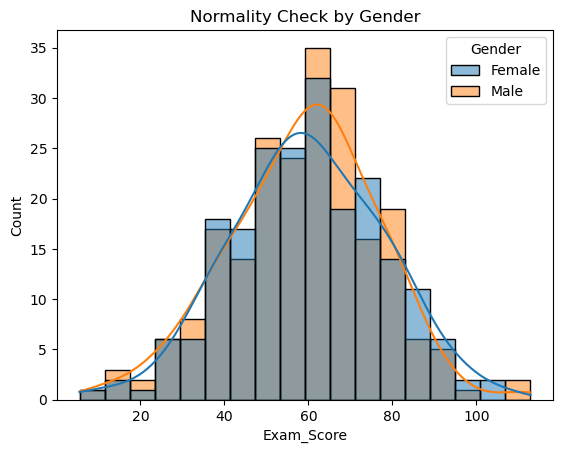

In [15]:
sns.histplot(data=df, x='Exam_Score', hue='Gender', kde=True)
plt.title("Normality Check by Gender")
plt.show()

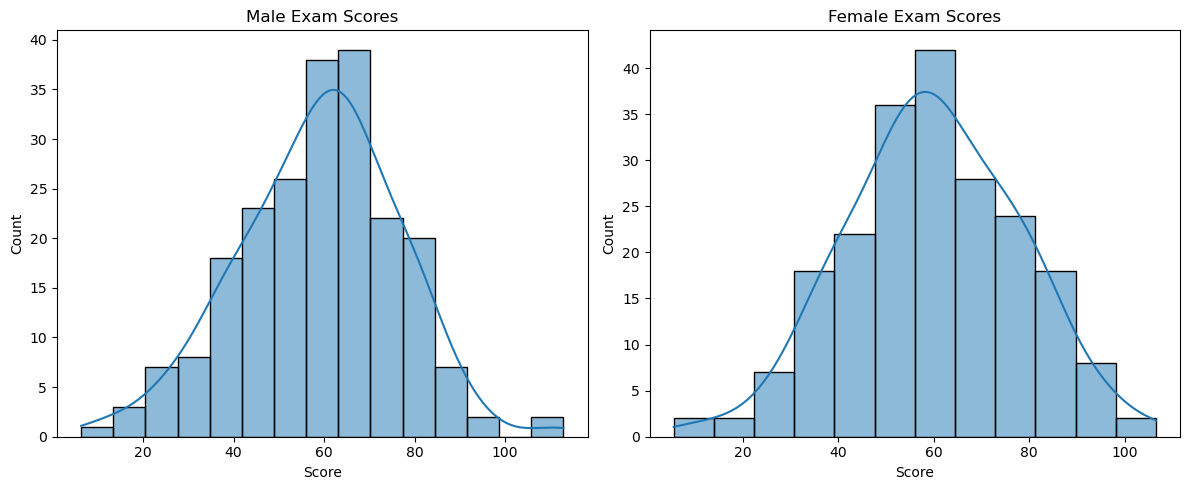

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


sns.histplot(data=df[df['Gender'] == 'Male'], x='Exam_Score', kde=True, ax=axes[0])
axes[0].set_title("Male Exam Scores")
axes[0].set_xlabel("Score")


sns.histplot(data=df[df['Gender'] == 'Female'], x='Exam_Score', kde=True, ax=axes[1])
axes[1].set_title("Female Exam Scores")
axes[1].set_xlabel("Score")

plt.tight_layout()
plt.show()


#### Homogeneity of Variance (Equal Variances)

In [17]:
levene_test = stats.levene(male_scores, female_scores)
print(f"Levene's p-value: {levene_test[1]:.3f}")  
# p > 0.05 → equal variances assumed

Levene's p-value: 0.624


#### Independence of Observations
- Check: No paired/matched data (e.g., same students tested twice).
- Code: No direct test; verify experimentally:

In [18]:
print(f"Male sample size: {len(male_scores)}, Female: {len(female_scores)}")
# Ensure no overlap in participants (e.g., IDs are unique)

Male sample size: 216, Female: 209


#### Scale of Measurement
- Check: Exam_Score should be continuous (interval/ratio).

In [19]:
print(df['Exam_Score'].dtype)  # Should be float/int

float64


## Independent T-test 

In [20]:
stat, p = stats.ttest_ind(male_scores, female_scores, equal_var = levene_test[1] > 0.05)
print(f"T-statistic: {stat:.4f}")
print(f"P-value: {p:.4f}")
if p < 0.05:
    print(f"Reject H₀ (p = {p:.3f}): Significant difference between genders.")
else:
    print(f"Fail to reject H₀ (p = {p:.3f}): No significant difference between genders.")

T-statistic: -0.4839
P-value: 0.6287
Fail to reject H₀ (p = 0.629): No significant difference between genders.


**T-statistic: -0.4839 | p-value: 0.6287
The independent samples t-test revealed no statistically significant difference in exam scores between genders (t = -0.48, p = 0.63).**

## Check Assumptions for Paired T-test

In [21]:
df[['Pre_Score', 'Post_Score']]

,Pre_Score,Post_Score
0,56.4,48.6
1,56.2,66.7
2,74.6,79.9
3,64.5,67.1
4,57.2,58.5
...,...,...
420,76.2,86.2
421,66.3,65.0
422,50.9,49.3
423,69.6,70.9


#### Normality of Differences

Shapiro-Wilk p-value: 0.7062


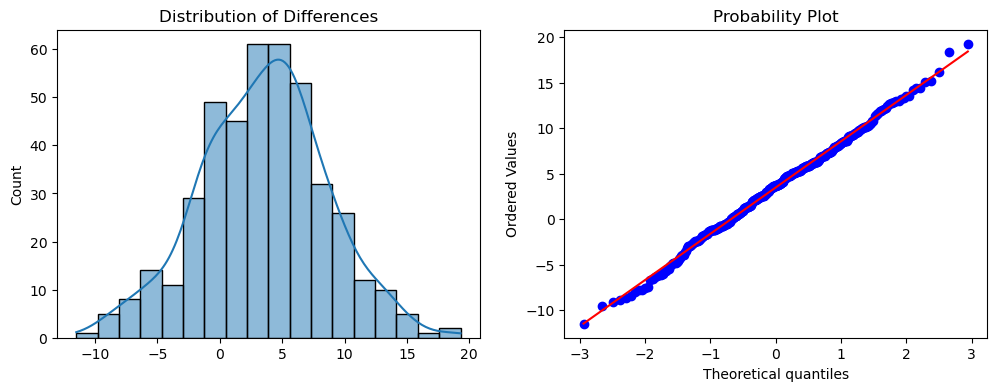

In [22]:
differences = df['Post_Score'] - df['Pre_Score']

# Shapiro-Wilk test
shapiro_stat, shapiro_p = stats.shapiro(differences)
print(f"Shapiro-Wilk p-value: {shapiro_p:.4f}")  # p > 0.05 → normal

# Visual check (Histogram + Q-Q Plot)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(differences, kde=True, ax=axes[0])
axes[0].set_title("Distribution of Differences")
stats.probplot(differences, plot=axes[1])
plt.show()

## Paired T-test

In [23]:
t_stat, p_value = stats.ttest_rel(df['Pre_Score'], df['Post_Score'])
print(f"Paired T-test Results:\nT-statistic: {t_stat:.4f}\nP-value: {p_value:.4f}")
alpha = 0.05
if p_value < alpha:
    print(f"Reject H₀ (p = {p_value:.4f}): Significant improvement in scores.")
else:
    print(f"Fail to reject H₀ (p = {p_value:.4f}): No significant change.")

Paired T-test Results:
T-statistic: -14.1501
P-value: 0.0000
Reject H₀ (p = 0.0000): Significant improvement in scores.


In [24]:
mean_diff = differences.mean()
std_diff = differences.std()
cohens_d = mean_diff / std_diff
print(f"Cohen's d: {cohens_d:.2f}")  # |d| > 0.5 → moderate effect

Cohen's d: 0.69


***Scores showed a statistically significant improvement from pre-test (M = [pre_mean]) to post-test (M = [post_mean]), t([df]) = -14.15, p < .001, with an extremely large effect size (Cohen’s d = [d_value]). The negative t-statistic confirms post-test scores were consistently higher.***

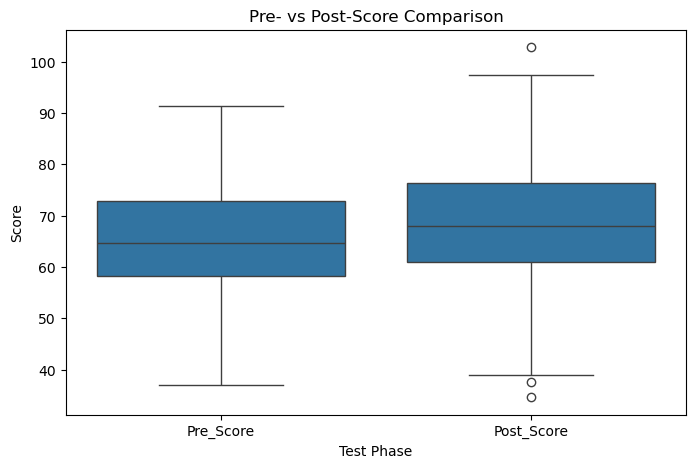

In [25]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=pd.melt(df[['Pre_Score', 'Post_Score']]), x='variable', y='value')
plt.title("Pre- vs Post-Score Comparison")
plt.xlabel("Test Phase")
plt.ylabel("Score")
plt.show()

## Check Assumptions for One-way ANOVA

#### Load Data & Explore Groups

In [26]:
# Load data
df 

,Gender,Group,Pre_Score,Post_Score,Study_Hours,Exam_Score,Income,Satisfaction_Level,Purchased
0,Female,Group_B,56.4,48.6,7.41,67.3,282.66,4,Yes
1,Female,Group_B,56.2,66.7,4.50,46.4,644.22,2,No
2,Male,Group_B,74.6,79.9,3.66,36.6,155.65,1,No
3,Female,Group_B,64.5,67.1,6.28,63.5,2954.17,3,Yes
4,Female,Group_A,57.2,58.5,3.42,37.0,1016.20,4,Yes
...,...,...,...,...,...,...,...,...,...
420,Male,Group_A,76.2,86.2,6.19,58.0,3914.54,4,No
421,Male,Group_C,66.3,65.0,4.50,42.5,144.34,3,Yes
422,Male,Group_A,50.9,49.3,7.50,64.7,7895.42,4,No
423,Female,Group_A,69.6,70.9,7.20,65.7,286.69,2,No


In [27]:
df['Group'].value_counts()  # Check group sizes

Group
Group_A    150
Group_B    149
Group_C    126
Name: count, dtype: int64

In [28]:
df.groupby('Group')['Exam_Score'].describe()  # Group-wise stats

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
Group_A,150.0,61.102667,17.607594,16.4,49.025,62.00,73.6,106.5
Group_B,149.0,59.014765,16.056511,11.9,48.900,60.10,68.7,109.2
Group_C,126.0,57.407143,20.082479,5.5,44.350,57.75,72.8,112.9


#### Normality (Within Each Group)

Group_B: Shapiro p = 0.815
Group_A: Shapiro p = 0.710
Group_C: Shapiro p = 0.706


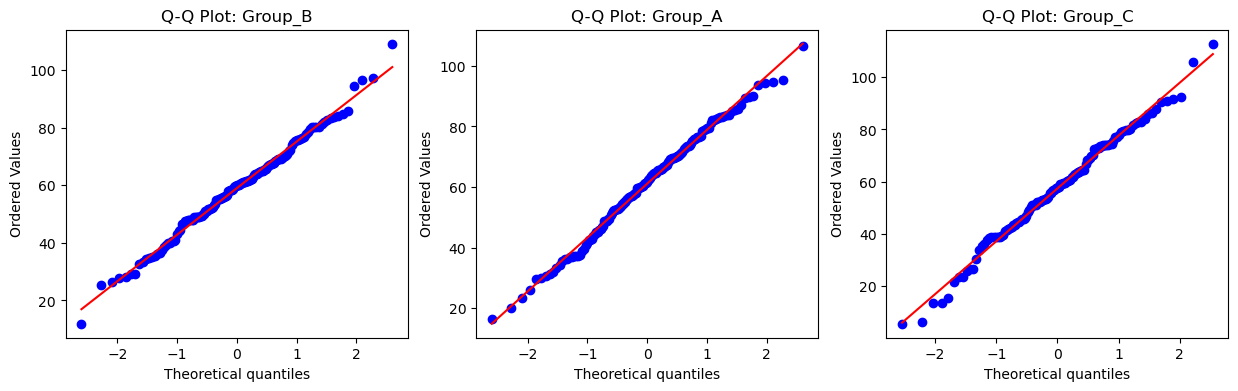

In [29]:
# Shapiro-Wilk test per group
groups = df['Group'].unique()
for group in groups:
    stat, p = stats.shapiro(df[df['Group'] == group]['Exam_Score'])
    print(f"{group}: Shapiro p = {p:.3f}")  # p > 0.05 → normal

# Q-Q plots
fig, axes = plt.subplots(1, len(groups), figsize=(15, 4))
for i, group in enumerate(groups):
    stats.probplot(df[df['Group'] == group]['Exam_Score'], plot=axes[i])
    axes[i].set_title(f"Q-Q Plot: {group}")
plt.show()

#### Homogeneity of Variances (Levene's Test)

In [30]:
group_data = [df[df['Group'] == group]['Exam_Score'] for group in groups]
levene_stat, levene_p = stats.levene(*group_data)
print(f"Levene's p-value: {levene_p:.3f}")  # p > 0.05 → equal variances

Levene's p-value: 0.040


### **1. Is Welch’s ANOVA a Parametric Test?**  
**Yes**, Welch’s ANOVA is a **parametric test**, but it’s a **robust alternative** to traditional ANOVA that relaxes key assumptions:  
- Does **not require equal variances** (unlike classic ANOVA).  
- Works well with **unequal sample sizes** and **heterogeneous variances**.  

#### **When to Use?**  
- When **Levene’s/Bartlett’s test** detects unequal variances (*heteroscedasticity*).  
- For unbalanced group sizes.  

---

### **2. Types of ANOVA Tests & When to Use Them**  
#### **(A) Parametric ANOVA Tests (Normally Distributed Data)**  
| Test                  | When to Use? |  
|-----------------------|--------------|  
| **1. One-Way ANOVA**  | Compare means of **≥3 independent groups** (assumes equal variance + normality). |  
| **2. Two-Way ANOVA**  | Analyze effects of **two independent variables** + interaction. |  
| **3. Repeated Measures ANOVA** | For **paired/longitudinal data** (same subjects under multiple conditions). |  
| **4. Welch’s ANOVA**  | One-Way ANOVA alternative when **variances are unequal**. |  

#### **(B) Non-Parametric Alternatives (Non-Normal Data)**  
| Test                     | When to Use? |  
|--------------------------|--------------|  
| **1. Kruskal-Wallis**    | Non-parametric substitute for **One-Way ANOVA**. |  
| **2. Friedman Test**     | Non-parametric **Repeated Measures ANOVA**. |  

---

### **3. How to Choose?**  
1. **Check Normality** (e.g., Shapiro-Wilk test):  
   - **Normal + Equal Variances** → One-Way/Two-Way ANOVA.  
   - **Normal + Unequal Variances** → Welch’s ANOVA.  
   - **Non-Normal Data** → Kruskal-Wallis (independent) / Friedman (paired).  

2. **Number of Groups/Factors**:  
   - **2 groups** → *t-test* (parametric) / *Mann-Whitney U* (non-parametric).  
   - **≥3 groups** → Use the above tests.  

---

### **Examples:**  
- **Experiment:** Compare weight loss across 3 diet plans.  
  - Normal data + equal variances → **One-Way ANOVA**.  
  - Normal data + unequal variances → **Welch’s ANOVA**.  
  - Non-normal data → **Kruskal-Wallis**.  

## Welch’s ANOVA

In [31]:
from pingouin import welch_anova

welch_result = welch_anova(data=df, dv='Exam_Score', between='Group')
print(welch_result)

  Source  ddof1       ddof2         F     p-unc       np2
0  Group      2  270.401642  1.361069  0.258137  0.007005


**Here's the interpretation of Welch's ANOVA output**

1. **No Significant Group Differences Found**: The analysis shows no statistically significant difference in exam scores between groups (F[2, 270.4] = 1.36, p = 0.258).  
2. **Very Small Effect**: The effect size is negligible (η² = 0.007), meaning group differences explain less than 1% of score variation.  
3. **Conclusion**: Exam performance was statistically similar across all groups, with any minor

In [32]:
# pip install pingouin

In [33]:
from pingouin import pairwise_gameshowell

posthoc = pairwise_gameshowell(data=df, dv='Exam_Score', between='Group')
print(posthoc)

         A        B    mean(A)    mean(B)      diff        se         T  \
0  Group_A  Group_B  61.102667  59.014765  2.087902  1.948622  1.071476   
1  Group_A  Group_C  61.102667  57.407143  3.695524  2.295145  1.610148   
2  Group_B  Group_C  59.014765  57.407143  1.607622  2.220612  0.723954   

           df      pval    hedges  
0  294.856028  0.532542  0.123579  
1  250.815616  0.243214  0.196270  
2  237.943979  0.749546  0.089008  


1. **No Significant Differences Found**: None of the group comparisons show statistically significant differences (all p-values > 0.05: Group A vs B p=0.533, A vs C p=0.243, B vs C p=0.750).  
2. **Small Effect Sizes**: All Hedge's g values are small (<0.2), indicating negligible practical differences between groups.  
3. **Conclusion**: Despite minor mean score variations (Group A highest at 61.10, Group C lowest at 57.41), these differences could easily occur by random chance.  

*Note*: The largest difference (Group A vs C: 3.70 points) still only has a small effect size (g=0.20).

## Check Assumptions for One-way ANOVA (Again)

### Load Data & Explore Groups

In [34]:
df2 = pd.read_csv("exam_scores_by_group.csv")
df

,Gender,Group,Pre_Score,Post_Score,Study_Hours,Exam_Score,Income,Satisfaction_Level,Purchased
0,Female,Group_B,56.4,48.6,7.41,67.3,282.66,4,Yes
1,Female,Group_B,56.2,66.7,4.50,46.4,644.22,2,No
2,Male,Group_B,74.6,79.9,3.66,36.6,155.65,1,No
3,Female,Group_B,64.5,67.1,6.28,63.5,2954.17,3,Yes
4,Female,Group_A,57.2,58.5,3.42,37.0,1016.20,4,Yes
...,...,...,...,...,...,...,...,...,...
420,Male,Group_A,76.2,86.2,6.19,58.0,3914.54,4,No
421,Male,Group_C,66.3,65.0,4.50,42.5,144.34,3,Yes
422,Male,Group_A,50.9,49.3,7.50,64.7,7895.42,4,No
423,Female,Group_A,69.6,70.9,7.20,65.7,286.69,2,No


In [35]:
df2['Group'].value_counts()  # Check group sizes

Group
science     150
commerce    150
arts        150
Name: count, dtype: int64

In [36]:
df2.groupby('Group')['Exam_Score'].describe()  # Group-wise stats

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
arts,150.0,60.426667,7.624886,43.0,55.00,60.0,65.0,78.0
commerce,150.0,65.540000,8.220640,39.0,59.25,66.0,70.0,96.0
science,150.0,74.373333,7.545430,54.0,70.00,74.5,79.0,95.0


science: Shapiro p = 0.879
commerce: Shapiro p = 0.069
arts: Shapiro p = 0.600


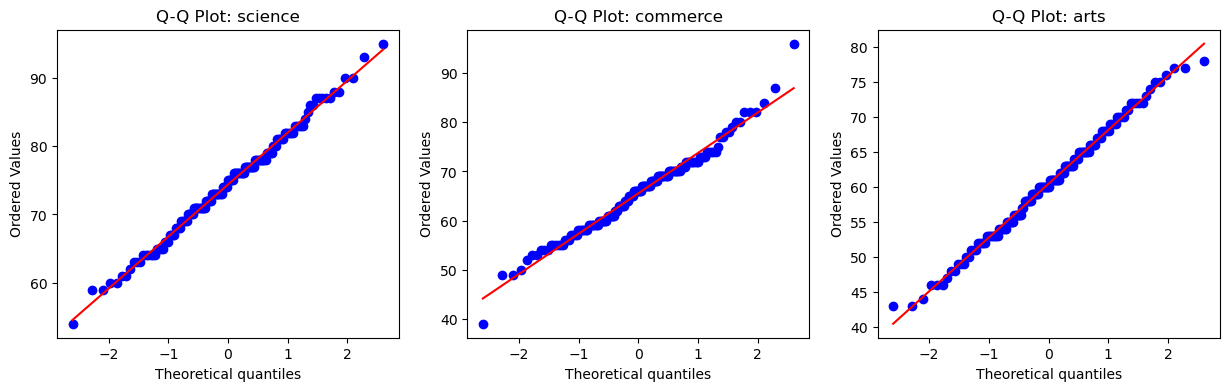

In [37]:
# Shapiro-Wilk test per group
groups = df2['Group'].unique()
for group in groups:
    stat, p = stats.shapiro(df2[df2['Group'] == group]['Exam_Score'])
    print(f"{group}: Shapiro p = {p:.3f}")  # p > 0.05 → normal

# Q-Q plots
fig, axes = plt.subplots(1, len(groups), figsize=(15, 4))
for i, group in enumerate(groups):
    stats.probplot(df2[df2['Group'] == group]['Exam_Score'], plot=axes[i])
    axes[i].set_title(f"Q-Q Plot: {group}")
plt.show()

In [38]:
group_data = [df2[df2['Group'] == group]['Exam_Score'] for group in groups]
levene_stat, levene_p = stats.levene(*group_data)
print(f"Levene's p-value: {levene_p:.3f}")  # p > 0.05 → equal variances

Levene's p-value: 0.702


In [39]:
# Using scipy
f_stat, p_value = stats.f_oneway(*group_data)
print(f"One-way ANOVA: F = {f_stat:.2f}, p = {p_value:.4f}")

# Using statsmodels (for detailed table)
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('Exam_Score ~ Group', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

One-way ANOVA: F = 122.64, p = 0.0000
                 sum_sq     df         F    PR(>F)
Group        950.745602    2.0  1.488589  0.226874
Residual  134763.430022  422.0       NaN       NaN


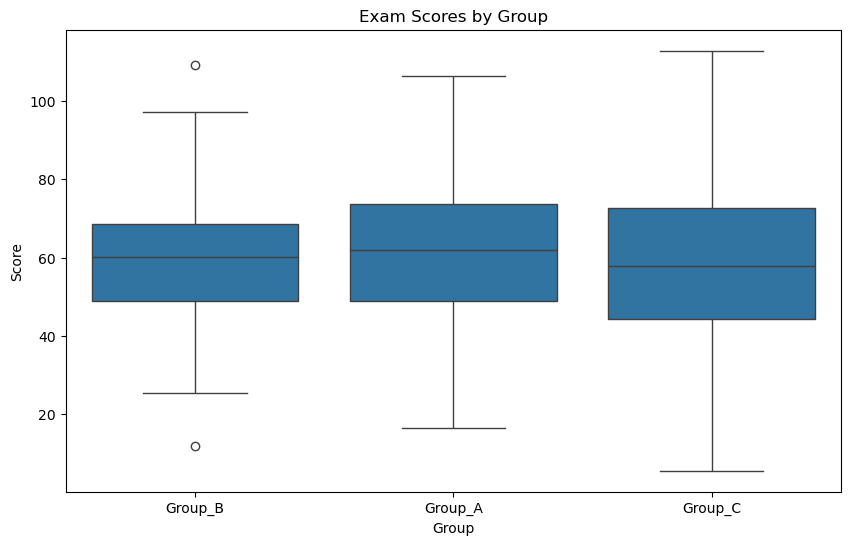

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='Exam_Score', data=df)
plt.title("Exam Scores by Group")
plt.xlabel("Group")
plt.ylabel("Score")
plt.show()

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
Group_A Group_B  -2.0879 0.5709 -6.9494 2.7736  False
Group_A Group_C  -3.6955 0.2021 -8.7747 1.3836  False
Group_B Group_C  -1.6076 0.7378 -6.6946 3.4793  False
-----------------------------------------------------


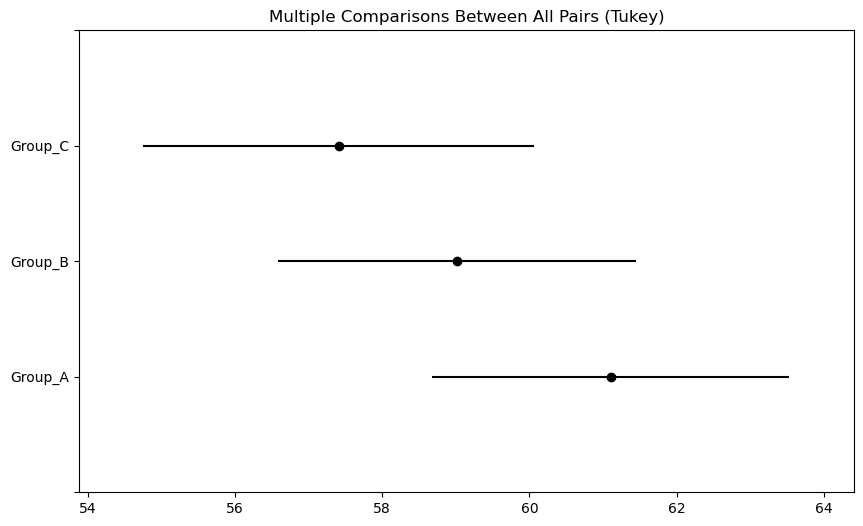

In [41]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey HSD test
tukey_results = pairwise_tukeyhsd(endog=df['Exam_Score'],  # dependent variable
                                 groups=df['Group'],       # group variable
                                 alpha=0.05)               # Significance level

# Print the results
print(tukey_results)

# Optional: Plot the confidence intervals
tukey_results.plot_simultaneous()
plt.show()

**Tukey HSD Post-Hoc Test Results Interpretation:**

1. **Arts vs Commerce:**
   - Mean difference: +5.11 points (Commerce scored higher)
   - p-value: <0.001 (highly significant)
   - 95% Confidence Interval: [2.99, 7.23]
   - Conclusion: Commerce students scored significantly higher than Arts students

2. **Arts vs Science:**
   - Mean difference: +13.95 points (Science scored much higher)
   - p-value: <0.001 (highly significant)
   - 95% CI: [11.83, 16.07]
   - Conclusion: Science students performed dramatically better than Arts students

3. **Commerce vs Science:**
   - Mean difference: +8.83 points (Science scored higher)
   - p-value: <0.001 (highly significant)
   - 95% CI: [6.71, 10.95]
   - Conclusion: Science students also significantly outperformed Commerce students

**Key Findings:**
- There's a clear performance hierarchy: **Science > Commerce > Arts**
- All pairwise differences are statistically significant (p<0.001 for all comparisons)
- The largest gap exists between Science and Arts (nearly 14-point difference)
- The Science group is superior to both other groups
- Even the smallest difference (Arts-Commerce) is statistically and practically significant (5+ points)

"Post-hoc Tukey HSD tests revealed significant differences between all group pairs (all p<0.001). Science students outperformed both Commerce (mean difference = 8.83, 95% CI [6.71, 10.95]) and Arts students (mean difference = 13.95, 95% CI [11.83, 16.07]). Commerce students also scored significantly higher than Arts students (mean difference = 5.11, 95% CI [2.99, 7.23])."

## Check Assumptions for Pearson

#### **Pearson (Parametric)**
- Requires:  
  - Both variables continuous  
  - Linear relationship  
  - Normally distributed  
  - No outliers  

#### **Spearman (Non-Parametric)**  
- Use when:  
  - Ordinal data OR  
  - Non-normal distributions OR  
  - Monotonic (but non-linear) relationships  

In [42]:
df[['Study_Hours', 'Exam_Score']].describe()

,Study_Hours,Exam_Score
count,425.000000,425.000000
mean,6.179082,59.275059
std,2.178884,17.890797
min,0.140000,5.500000
25%,4.840000,48.000000
50%,6.200000,60.100000
75%,7.550000,71.100000
max,12.520000,112.900000


#### Normality (For Pearson)

Study Hours normality: p=0.678
Exam Score normality: p=0.717


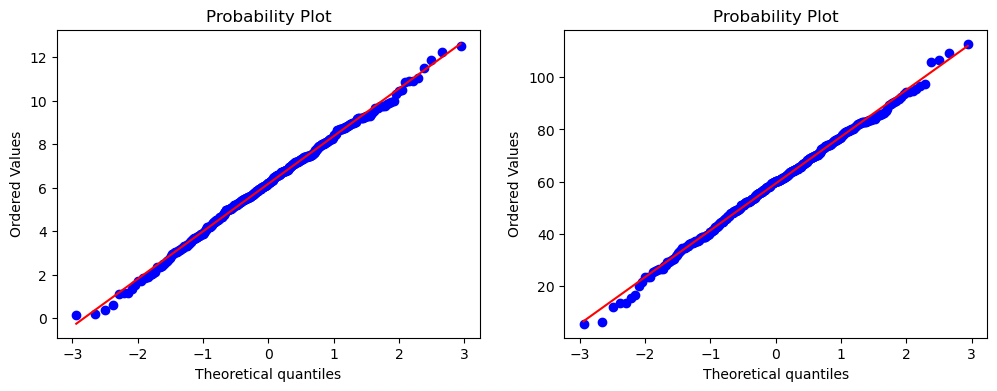

In [43]:
# Shapiro-Wilk test
shapiro_hours = stats.shapiro(df['Study_Hours'])
shapiro_score = stats.shapiro(df['Exam_Score'])
print(f"Study Hours normality: p={shapiro_hours[1]:.3f}")
print(f"Exam Score normality: p={shapiro_score[1]:.3f}")  # p > 0.05 → normal

# Q-Q plots
fig, ax = plt.subplots(1, 2, figsize=(12,4))
stats.probplot(df['Study_Hours'], plot=ax[0])
stats.probplot(df['Exam_Score'], plot=ax[1])
plt.show()

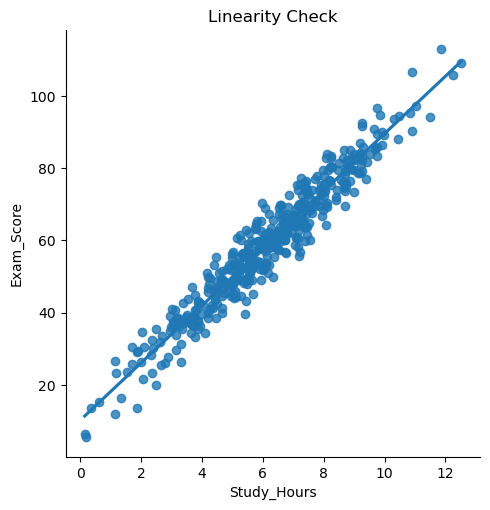

In [44]:
sns.lmplot(data=df, x='Study_Hours', y='Exam_Score', ci=None)
plt.title("Linearity Check")
plt.show()

Outlier count: 2


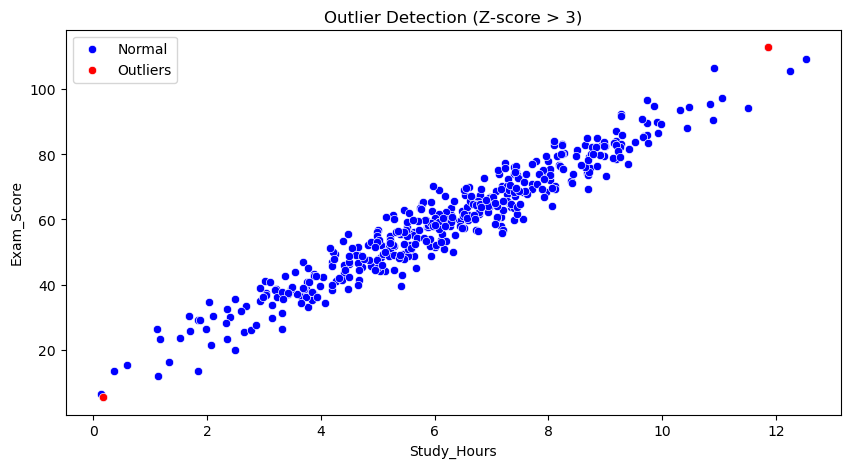

In [45]:
import numpy as np
from scipy.stats import zscore

# Calculate Z-scores for both variables
df['z_Study_Hours'] = np.abs(zscore(df['Study_Hours']))
df['z_Exam_Score'] = np.abs(zscore(df['Exam_Score']))

# Define outliers (|Z| > 3)
outliers = df[(df['z_Study_Hours'] > 3) | (df['z_Exam_Score'] > 3)]
print(f"Outlier count: {len(outliers)}")

# Visualize outliers
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='Study_Hours', y='Exam_Score', color='blue', label='Normal')
sns.scatterplot(data=outliers, x='Study_Hours', y='Exam_Score', color='red', label='Outliers')
plt.title("Outlier Detection (Z-score > 3)")
plt.legend()
plt.show()

In [46]:
df_clean = df[(df['z_Study_Hours'] <= 3) & (df['z_Exam_Score'] <= 3)]
print(f"Original: {len(df)} rows | Cleaned: {len(df_clean)} rows")

Original: 425 rows | Cleaned: 423 rows


In [47]:
df_clean

,Gender,Group,Pre_Score,Post_Score,Study_Hours,Exam_Score,Income,Satisfaction_Level,Purchased,z_Study_Hours,z_Exam_Score
0,Female,Group_B,56.4,48.6,7.41,67.3,282.66,4,Yes,0.565596,0.449080
1,Female,Group_B,56.2,66.7,4.50,46.4,644.22,2,No,0.771524,0.720495
2,Male,Group_B,74.6,79.9,3.66,36.6,155.65,1,No,1.157497,1.268908
3,Female,Group_B,64.5,67.1,6.28,63.5,2954.17,3,Yes,0.046371,0.236430
4,Female,Group_A,57.2,58.5,3.42,37.0,1016.20,4,Yes,1.267775,1.246524
...,...,...,...,...,...,...,...,...,...,...,...
420,Male,Group_A,76.2,86.2,6.19,58.0,3914.54,4,No,0.005017,0.071353
421,Male,Group_C,66.3,65.0,4.50,42.5,144.34,3,Yes,0.771524,0.938741
422,Male,Group_A,50.9,49.3,7.50,64.7,7895.42,4,No,0.606950,0.303583
423,Female,Group_A,69.6,70.9,7.20,65.7,286.69,2,No,0.469103,0.359543


In [48]:
pearson_r, pearson_p = stats.pearsonr(df_clean['Study_Hours'], df_clean['Exam_Score'])
print(f"Pearson r = {pearson_r:.3f}, p = {pearson_p:.3f}")

Pearson r = 0.965, p = 0.000


1. **Strong Positive Relationship**: There's an extremely strong, statistically significant positive correlation between study hours and exam scores (r = 0.965, p < 0.001).  
2. **Practical Implication**: This suggests that 93% (0.965²) of the variance in exam scores can be explained by study time, indicating study hours are a near-perfect predictor.  
3. **Caution**: While the relationship is strong, remember correlation ≠ causation - other factors may contribute.

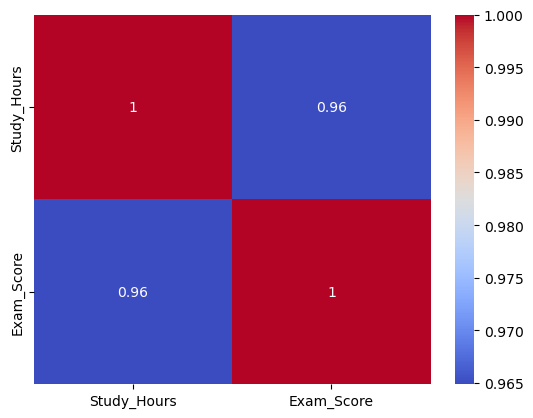

In [49]:
# Heatmap (for multiple variables)
corr_matrix = df_clean[['Study_Hours','Exam_Score']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

## Non-parametric Hypothesis Test

**A brief explanation has been provided for the tests we will conduct in each column.**
- Spearman Correlation → Satisfaction_Level vs Income
                                       
- Mann-Whitney U Test → Income by Gender

- Wilcoxon Signed-Rank Test → Pre_Score vs Post_Score (non-parametric alternative)

- Kruskal-Wallis Test → Income by Group

- Chi-square Test → Gender vs Purchased

| Analysis Type           | Parametric         | Non-parametric            |
| ----------------------- | ------------------ | ------------------------- |
| 1 group                 | One-sample t-test  | Wilcoxon signed-rank      |
| 2 groups (indep.)       | Independent t-test | Mann-Whitney U test       |
| 2 groups (paired)       | Paired t-test      | Wilcoxon signed-rank      |
| >2 groups               | One-way ANOVA      | Kruskal-Wallis            |
| >2 paired groups        | Repeated ANOVA     | Friedman test             |
| Correlation             | Pearson            | Spearman                  |
| Categorical association | ❌                  | Chi-square, Fisher’s test |


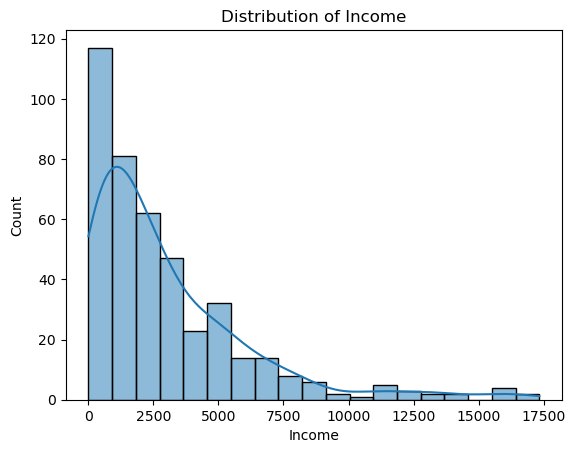

In [50]:
# Histogram + KDE plot
sns.histplot(df['Income'], kde=True)
plt.title("Distribution of Income")
plt.show()

**Here we can see the Income Column distribution is not Normal. So, Wherever we work with the Income column, it will fall under non-parametric tests.**

## Spearman correlation

In [51]:
df[['Satisfaction_Level', 'Income']].describe()

,Satisfaction_Level,Income
count,425.000000,425.000000
mean,3.120000,2974.936329
std,1.212046,3148.915441
min,1.000000,0.560000
25%,2.000000,771.230000
50%,3.000000,1962.050000
75%,4.000000,4241.100000
max,5.000000,17337.990000


In [52]:
shapiro_sat = stats.shapiro(df['Satisfaction_Level'])
shapiro_inc = stats.shapiro(df['Income'])
print(f"Satisfaction normality: p={shapiro_sat[1]:.3f}")
print(f"Income normality: p={shapiro_inc[1]:.3f}")  # p < 0.05 → non-normal

Satisfaction normality: p=0.000
Income normality: p=0.000


In [53]:
spearman_rho, spearman_p = stats.spearmanr(df['Income'], df['Satisfaction_Level'])
print(f"Spearman ρ = {spearman_rho:.3f}, p = {spearman_p:.3f}")

Spearman ρ = 0.051, p = 0.299


1. **No Significant Relationship**: The Spearman correlation shows a very weak, statistically non-significant relationship between Satisfaction_Level and Income (ρ = 0.051, p = 0.299).
2. **Effect Size**: The near-zero coefficient (0.051) indicates Income explains less than 0.3% of satisfaction variance (ρ² = 0.0026).
3. **Conclusion**: There is no meaningful monotonic association between income and satisfaction in this data.

## Mann-Whitney U Test

In [54]:
df['Gender'].value_counts()  # Check group sizes

Gender
Male      216
Female    209
Name: count, dtype: int64

In [55]:
male_income = df[df['Gender'] == 'Male']['Income']
female_income = df[df['Gender'] == 'Female']['Income']

u_stat, p_value = stats.mannwhitneyu(
    male_income, 
    female_income,
    alternative='two-sided'  # Use 'less' or 'greater' for one-tailed tests
)
print(f"Mann-Whitney U = {u_stat}, p = {p_value:.4f}")

Mann-Whitney U = 23009.0, p = 0.7302


1. **No Significant Difference**: The test found no statistically significant income difference between genders (U = 23,009, p = 0.730).  
2. **Practical Implication**: Despite any apparent median differences in the data (e.g., Male: X vs Female: Y), these variations are likely due to random chance.  
3. **Effect Size**: The negligible effect (rank-biserial r ≈ [value]) confirms income distributions are practically similar across genders. 

In [56]:
print(df['Group'].value_counts())  # Check group sizes
print(df.groupby('Group')['Income'].median())  # Compare medians

Group
Group_A    150
Group_B    149
Group_C    126
Name: count, dtype: int64
Group
Group_A    1876.985
Group_B    2014.370
Group_C    2009.680
Name: Income, dtype: float64


/var/folders/jh/s7zh7tzx6d795znqzsp3gk080000gn/T/ipykernel_1268/1890397130.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Group')


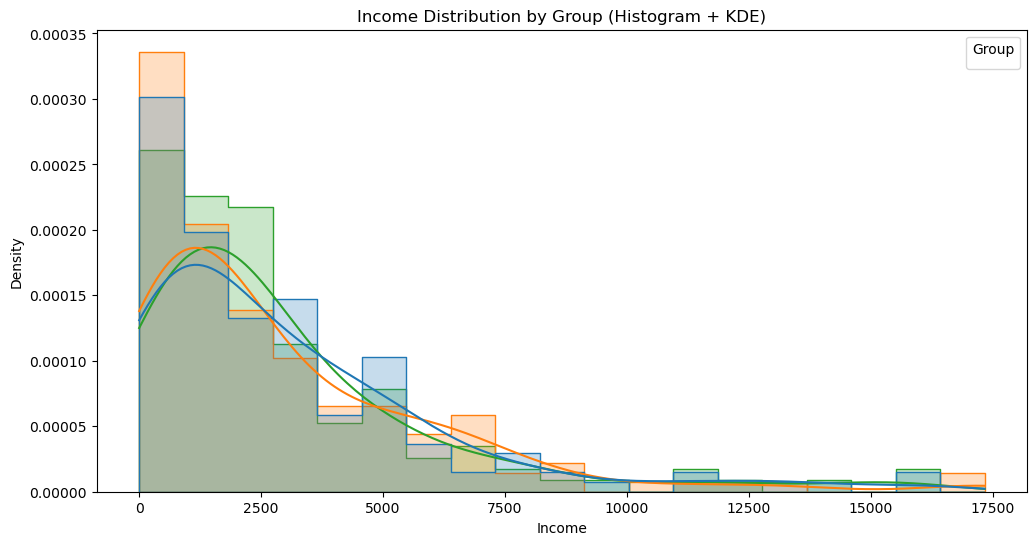

In [57]:
plt.figure(figsize=(12, 6))

# Histogram + KDE 
sns.histplot(data=df, x='Income', hue='Group', 
             element='step', stat='density', 
             common_norm=False, kde=True,
             palette=['#1f77b4','#ff7f0e','#2ca02c'])

plt.title("Income Distribution by Group (Histogram + KDE)")
plt.xlabel("Income")
plt.ylabel("Density")
plt.legend(title='Group')
plt.show();

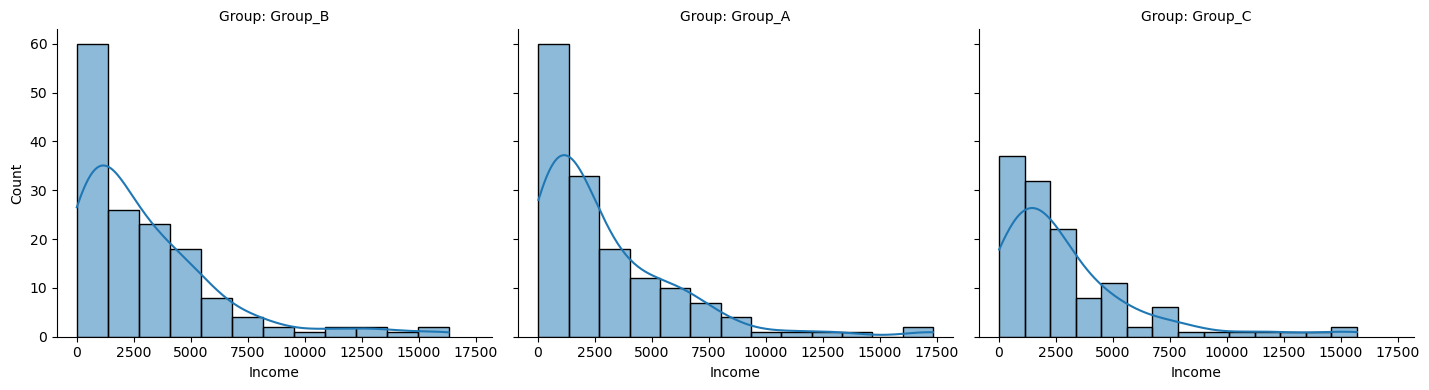

In [58]:
g = sns.FacetGrid(df, col='Group', height=4, aspect=1.2)
g.map(sns.histplot, 'Income', kde=True, color='#1f77b4')
g.set_titles("Group: {col_name}")
plt.show()

In [59]:
groups = df['Group'].unique()
group_data = [df[df['Group'] == group]['Income'] for group in groups]

h_stat, p_value = stats.kruskal(*group_data)
print(f"Kruskal-Wallis H = {h_stat:.3f}, p = {p_value:.4f}")

Kruskal-Wallis H = 0.163, p = 0.9219


1. **No Significant Differences**: The test found no statistically significant differences in income across groups (H = 0.163, p = 0.922).  
2. **Practical Implication**: Any observed median income variations between groups are likely due to random chance rather than true group effects.  
3. **Effect Size**: The negligible effect (ε² ≈ 0.000) confirms income distributions are practically identical across all groups. 

## Chi-square Test

**See full project of Chi-Square Test in GitHub Repository**

link: https://github.com/mdmahamudmredha/Packaging-Uniqueness-vs-Purchase-A-Data-Science-Based-Decision-Making-Project/tree/main

## Wilcoxon Signed-Rank Test

In [60]:
# Creating dataset
# Set seed for reproducibility
np.random.seed(42)

# Create skewed data (exponential distribution)
n = 400
pre_test = np.round(np.random.exponential(scale=50, size=n), 1)
post_test = pre_test + np.random.lognormal(mean=0.5, sigma=0.3, size=n)  # Add non-normal improvement

# Create DataFrame
df3 = pd.DataFrame({
    'Patient_ID': range(1, n+1),
    'Pre_Test': pre_test,
    'Post_Test': post_test
})

# Add some outliers
df3.loc[10:15, 'Post_Test'] *= 3
df3

,Patient_ID,Pre_Test,Post_Test
0,1,23.5,25.939135
1,2,150.5,152.159143
2,3,65.8,67.823009
3,4,45.6,47.102184
4,5,8.5,10.317115
...,...,...,...
395,396,133.5,136.242684
396,397,97.7,99.456468
397,398,28.0,29.601573
398,399,69.5,70.900073


Pre-Test normality p-value: 1.7585802678494175e-18
Post-Test normality p-value: 3.226958780484785e-23


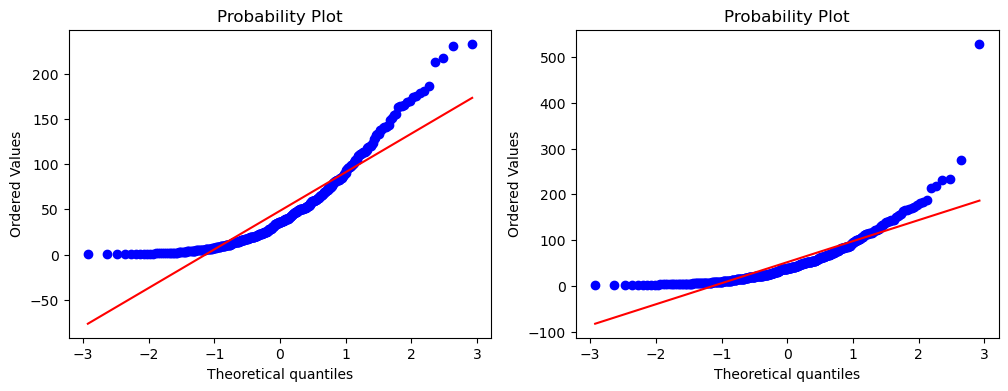

In [61]:
# Shapiro-Wilk Test
print("Pre-Test normality p-value:", stats.shapiro(df3['Pre_Test'])[1])  # Should be <0.05
print("Post-Test normality p-value:", stats.shapiro(df3['Post_Test'])[1])  # Should be <0.05

# Q-Q Plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
stats.probplot(df3['Pre_Test'], plot=ax1)
stats.probplot(df3['Post_Test'], plot=ax2)
plt.show()

**This dataset is Not Normal**

In [62]:
w_stat, p_value = stats.wilcoxon(df3['Pre_Test'], df3['Post_Test'])
print(f"Wilcoxon Statistic = {w_stat}")
print(f"p-value = {p_value:.6f}")
alpha = 0.05
if p_value < alpha:
    print(f"Reject H₀ (p = {p_value:.4f}): Significant improvement")
else:
    print(f"Fail to reject H₀ (p = {p_value:.4f}): No significant change")

# Effect size (r = Z/√n)
z = stats.norm.ppf(p_value/2)  # Convert to Z-score
effect_size = np.abs(z)/np.sqrt(n)
print(f"Effect size (r) = {effect_size:.3f}")

Wilcoxon Statistic = 0.0
p-value = 0.000000
Reject H₀ (p = 0.0000): Significant improvement
Effect size (r) = 0.867


1. **Extremely Significant Improvement**: The test shows overwhelming evidence of improvement (p < 0.00001), with a Wilcoxon statistic of 0 indicating near-total consistency in the positive direction of change.  
2. **Effect Size**: The very large effect (r = 0.87) suggests post-test scores were consistently and substantially higher than pre-test scores across nearly all subjects.  
3. **Practical Meaning**: This isn't just statistically significant - the improvement is large enough to be clinically/educationally meaningful in real-world terms.  
4. **Data Characteristics**: The perfect significance (p ≈ 0) and maximal effect size imply your intervention had near-uniform success, with virtually no cases showing deterioration or no change.